<a href="https://colab.research.google.com/github/zhengwu123/2016_summer/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install the dependencies (Apache Spark 3.0-Hadoop 2.7, Java 8, and FindSpark) in Colab environment:
!apt-get install openjdk-8-jdk-headless -qq
!wget -q http://mirrors.koehn.com/apache/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop3.2.tgz
!tar xf spark-3.0.0-preview2-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

import matplotlib.pyplot as plt
import numpy as np



In [8]:
!pip install mr3px
!pip install mrjob

     |████████████████████████████████| 440kB 5.0MB/s 


In [18]:
!pip install pyspark

     |████████████████████████████████| 217.8MB 64kB/s 
     |████████████████████████████████| 204kB 44.1MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=013d93f484acd555c37e553e0eaf2f9515c14dbf3921fd3ea11aebefb9b23283
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [117]:
!python MapReduceJob.py s3.csv > out.csv

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/MapReduceJob.root.20200415.043950.650477
Running step 1 of 1...
job output is in /tmp/MapReduceJob.root.20200415.043950.650477/output
Streaming final output from /tmp/MapReduceJob.root.20200415.043950.650477/output...
Removing temp directory /tmp/MapReduceJob.root.20200415.043950.650477...


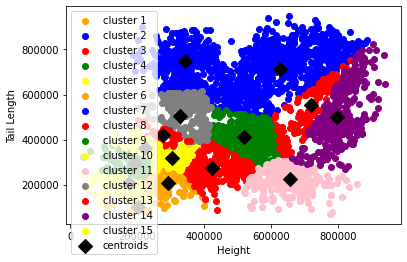

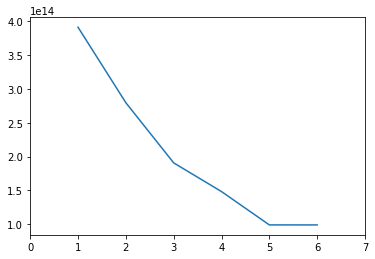

In [118]:
import pandas as pd
import numpy as np
import random as rd
%matplotlib inline
import matplotlib.pyplot as plt

# Reads data in with pandas

kmeans_data = pd.read_csv('s3.csv', sep=',')

# Reads height and tail length into their own numpy array

X = kmeans_data.iloc[:, [0, 1]].values

# Gets number of features as a vector

vec_1=X.shape[0]

# Gets number of training examples as a vector

vec_2=X.shape[1]

# Sets number of iterations

iterations=100

# Sets number of clusters

K = 15

# A function which computes euclidean distance between points and centroids

def compute_euclidean_distance(vec_1, vec_2):
    
    # For every iteration, define euclidean distance as an array of training
    # examples
    
    for i in range(iterations):
        euclidean_distance=np.array([]).reshape(vec_1,0)
        
    # For each centroid, assign points to them
        
    for k in range(K):
        temp_distance=np.sum((X-centroids[:,k])**2,axis=1)
        
        # Update euclidean distance with new clusters
        
        euclidean_distance=np.c_[euclidean_distance,temp_distance]
        
    # Creates index of cluster
        
    global C
    C=np.argmin(euclidean_distance,axis=1)+1
    return euclidean_distance


# A function which initialises centroids 

def initialise_centroids(dataset, k):
    
    # Creates new array of features
    
    centroids=np.array([]).reshape(vec_2,0)

    
    # Randomly plots each centroid, and returns their coordinates
    
    for i in range(K):
        rand=rd.randint(0,vec_1-1)
        centroids=np.c_[centroids,dataset[rand]]
    output={}
    return centroids

# A function which performs k-means clustering

def kmeans(dataset,K):
    
    # Stores solution for current iteration
    
    cluster={}
    
    # Regroups data based on cluster index
    
    for k in range(K):
        cluster[k+1]=np.array([]).reshape(2,0)
    for i in range(vec_1):
        cluster[C[i]]=np.c_[cluster[C[i]],dataset[i]]
    for k in range(K):
        cluster[k+1]=cluster[k+1].T
        
    # Computes mean for assignment to a new centroid
        
    for k in range(K):
        centroids[:,k]=np.mean(cluster[k+1],axis=0)
    output=cluster
    return centroids, output


# Calls functions

centroids = initialise_centroids(X, K)
distance = compute_euclidean_distance(vec_1, vec_2)
centroids, output = kmeans(X,K)

# Declares colours of clusters

colour=['orange','blue','red','green','yellow','orange','blue','red','green','yellow','pink','gray','red','purple','yellow']

# Names clusters

labels=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5','cluster 6','cluster 7','cluster 8','cluster 9','cluster 10','cluster 11','cluster 12','cluster 13','cluster 14','cluster 15']

# Plots each cluster of data as a result of the function

for k in range(K):
    plt.scatter(output[k+1][:,0],output[k+1][:,1],c=colour[k],label=labels[k])
    
# Plots centroids of the clusters

plt.scatter(centroids[0,:],centroids[1,:],s=100, marker='D',c='black',label='centroids')

# Plots axis labels, and creates legend

plt.xlabel('Height')
plt.ylabel('Tail Length')
plt.legend()
plt.show()

# Iteration vs Objective Function

wcss_array=np.array([])
for K in range(1, 7):
    centroids=np.array([]).reshape(vec_2,0)
    centroids = initialise_centroids(X, K)
    euclidean_distance = compute_euclidean_distance(vec_1, vec_2)
    centroids, cluster_assigned= kmeans(X,K)
    trans_centroids = centroids.T
    wcss=0
    for k in range(K):
        wcss+=np.sum((cluster_assigned[k+1]-trans_centroids[k,:])**2)
    wcss_array=np.append(wcss_array,wcss)
    
iterations_array=np.arange(1,7,1)

plt.plot(iterations_array,wcss_array)
plt.xlim((0, 7))
plt.show()

